In [1]:
from mantle_utils.alg.raster import Raster
from rasterio.windows import Window
import numpy as np
import pandas as pd
from mantle_utils.workflow.enqueue import get_raster_stack_paths_and_metadata
from mantle_utils.workflow.process import sanitize_raster_stack_paths_and_metadata

In [15]:
stack_raster_paths, stack_metadata = \
    get_raster_stack_paths_and_metadata(
        env_name='production',
        stacking_source_run_name='nirlipta_30UXB_stack',
        tile_idx='30UXB',
        raise_on_inconsistent_stack=False)
   
stack_df = sanitize_raster_stack_paths_and_metadata(
    raster_paths=stack_raster_paths,
    stack_metadata=stack_metadata,
    sanitize_paths=False)
#target = stack_df[np.logical_and(stack_df['start_datetime'] >= np.datetime64('2019-01-01'), stack_df['start_datetime'] < np.datetime64('2019-04-01'))]
target = stack_df[np.logical_and(stack_df['source_artefact_name'] == 'VVVH',stack_df['start_datetime'] >= np.datetime64('2019-01-05'))]
target = target.iloc[0]

In [16]:
#print(type(target['raster_path']))
window = Window(col_off=100, row_off=200, width=80, height=50)
target = Raster((target['raster_path']), window=window)
target = target.array.reshape(50,80)

In [18]:
target

array([[142, 141, 141, ..., 136, 139, 141],
       [142, 141, 142, ..., 138, 138, 140],
       [142, 142, 142, ..., 138, 139, 140],
       ...,
       [148, 149, 152, ..., 156, 157, 158],
       [149, 150, 152, ..., 156, 156, 156],
       [150, 150, 152, ..., 156, 156, 157]], dtype=uint8)

In [19]:
pred = np.load('./prediction.npy')
pred

array([[189.21087311, 189.13970539, 189.11491197, ..., 190.28367825,
        190.11156786, 189.95144328],
       [189.28306792, 188.83469951, 188.9386955 , ..., 190.30140969,
        190.08425737, 189.9778762 ],
       [189.74749663, 189.39769175, 189.09693333, ..., 189.88320439,
        189.98589635, 189.93023256],
       ...,
       [195.98352699, 196.3685087 , 197.4020664 , ..., 196.39925608,
        196.38142817, 196.82815895],
       [195.93860183, 196.20000457, 197.25892283, ..., 196.67239797,
        196.99292652, 197.01795662],
       [195.72050816, 196.29787416, 197.31898229, ..., 196.93963246,
        197.21146629, 197.49164637]])

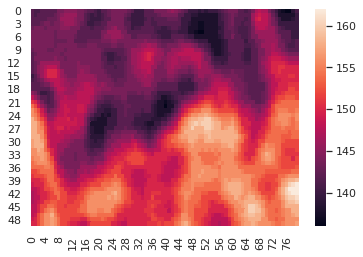

In [24]:
import seaborn as sns; sns.set_theme()
sns.heatmap(target)

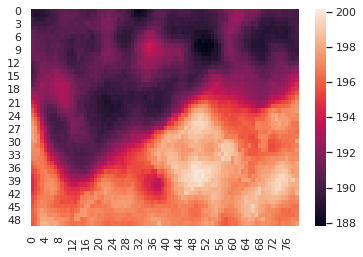

In [25]:
sns.heatmap(pred)

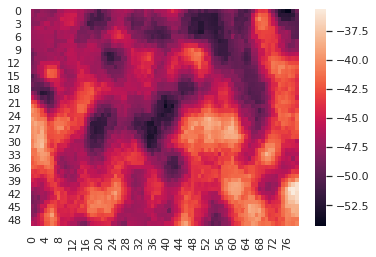

In [26]:
err = target - pred
sns.heatmap(err)